### Import the required Libraries

In [1]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

#Visualisation imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
#!pip install pandas-datareader
import pandas_datareader.data as web
from datetime import datetime



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#We're going to analyse stock info for Apple, Google, Microsoft and Amazon.
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
#Setting the end date to today
end = datetime.now()

In [4]:
#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

#### **Reading the Data from Yahoo finance website directly**

In [5]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

**Amazon**’s stock data will be stored in the AMZN global variable dataframe.

In [6]:
AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-06,173.695496,166.934494,169.649994,171.368500,68860000.0,171.368500
2021-12-07,177.499496,173.334503,174.600006,176.164505,66410000.0,176.164505
2021-12-08,177.179993,174.750504,176.150497,176.158005,45254000.0,176.158005
2021-12-09,176.969498,174.139496,175.750000,174.171005,46062000.0,174.171005
2021-12-10,175.927002,170.500000,175.417007,172.212006,60690000.0,172.212006
...,...,...,...,...,...,...
2022-11-29,94.410004,91.440002,94.040001,92.419998,65567300.0,92.419998
2022-11-30,96.540001,91.529999,92.470001,96.540001,102628200.0,96.540001
2022-12-01,97.230003,94.919998,96.989998,95.500000,68488000.0,95.500000


#### **Reading the Data from Yahoo finance website directly**

Amazon's Stock’s minimum, maximum, and average price was 

In [7]:
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,134.611244,130.020996,132.452843,132.262677,7.470822e+07,132.262677
std,23.896901,23.869249,23.945140,23.928146,3.408129e+07,23.928146
min,89.480003,85.870003,89.470001,86.139999,3.508860e+07,86.139999
25%,115.406752,111.369125,113.389999,113.430000,5.380218e+07,113.430000
50%,131.389999,126.794998,129.874496,129.104996,6.502665e+07,129.104996
75%,155.929001,150.668503,153.571747,153.151379,8.497128e+07,153.151379
max,177.499496,174.750504,176.150497,176.164505,2.726620e+08,176.164505


#### **Cleaning the Data**

Adding a new column named **Company** in each Dataframe

In [8]:
AAPL['Company'] = 'Apple'
GOOG['Company'] = 'Google'
AMZN['Company'] = 'Amazon'
MSFT['Company'] = 'Microsoft'

Merging all the Dataframe together to create a single Dataframe

In [9]:
stocks=pd.concat([AAPL,AMZN,GOOG,MSFT])

In [10]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2021-12-06,167.880005,164.279999,164.289993,165.320007,107497000.0,164.366058,Apple
2021-12-07,171.580002,168.339996,169.080002,171.179993,120405400.0,170.192215,Apple
2021-12-08,175.960007,170.699997,172.130005,175.080002,116998900.0,174.069748,Apple
2021-12-09,176.750000,173.919998,174.910004,174.559998,108923700.0,173.552734,Apple
2021-12-10,179.630005,174.690002,175.210007,179.449997,115402700.0,178.414520,Apple


Checking the basic information of the data

In [11]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2021-12-06 to 2022-12-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1008 non-null   float64
 1   Low        1008 non-null   float64
 2   Open       1008 non-null   float64
 3   Close      1008 non-null   float64
 4   Volume     1008 non-null   float64
 5   Adj Close  1008 non-null   float64
 6   Company    1008 non-null   object 
dtypes: float64(6), object(1)
memory usage: 63.0+ KB


Checking for null values

In [12]:
stocks.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

Checking for duplicates

In [13]:
stocks.duplicated().sum()

0

#### **What was the change in a stock’s price over time?**

In [14]:
Companies = stocks['Company'].drop_duplicates().values
print(Companies)

['Apple' 'Amazon' 'Google' 'Microsoft']


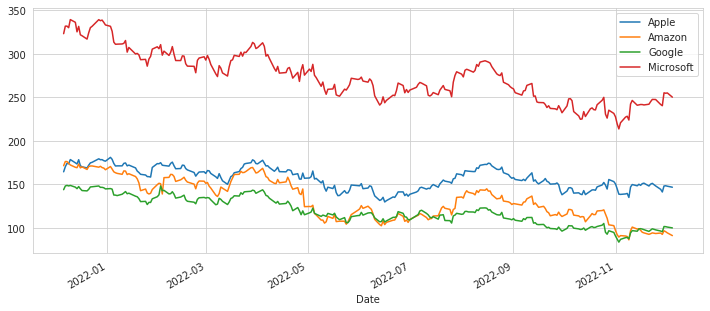

In [15]:
grouped = stocks.groupby('Company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)

price trend of individual stocks

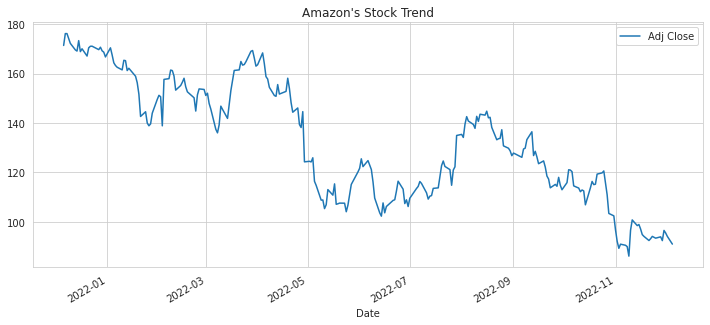

In [16]:
AMZN['Adj Close'].plot(legend=True,figsize=(12,5),title = "Amazon's Stock Trend")

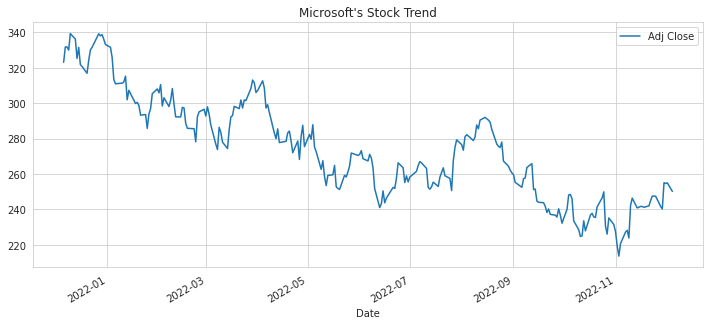

In [17]:
#Plotting the stock's adjusted closing price using pandas
MSFT['Adj Close'].plot(legend=True,figsize=(12,5),title = "Microsoft's Stock Trend")

#### Visualize the change in a stock’s volume being traded, over time?

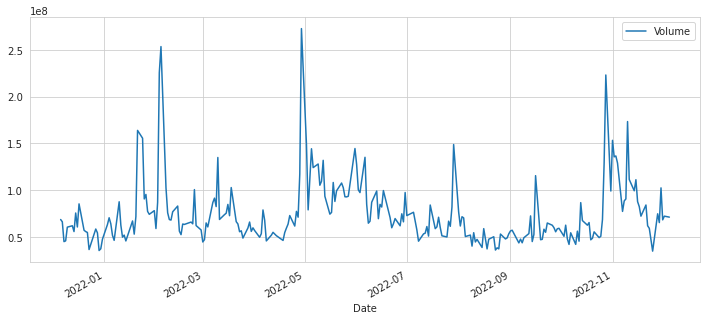

In [18]:
#Plotting the total volume being traded over time
AMZN['Volume'].plot(legend=True,figsize=(12,5))

#### **What was the moving average of various stocks?**

In [19]:
ma_per_day = [20,50,100]

for ma in ma_per_day:
    column_name = "MA for %s days" %(str(ma))
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=ma,center=False).mean()

In [20]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2022-11-29,94.410004,91.440002,94.040001,92.419998,65567300.0,92.419998,Amazon,93.8185,106.5446,118.0013
2022-11-30,96.540001,91.529999,92.470001,96.540001,102628200.0,96.540001,Amazon,93.8060,106.0316,117.8492
2022-12-01,97.230003,94.919998,96.989998,95.500000,68488000.0,95.500000,Amazon,93.9750,105.5708,117.7120
2022-12-02,95.360001,93.779999,94.480003,94.129997,72427000.0,94.129997,Amazon,94.2165,105.1072,117.5493
2022-12-05,94.059998,90.820000,93.050003,91.010002,71391500.0,91.010002,Amazon,94.2180,104.6518,117.3531


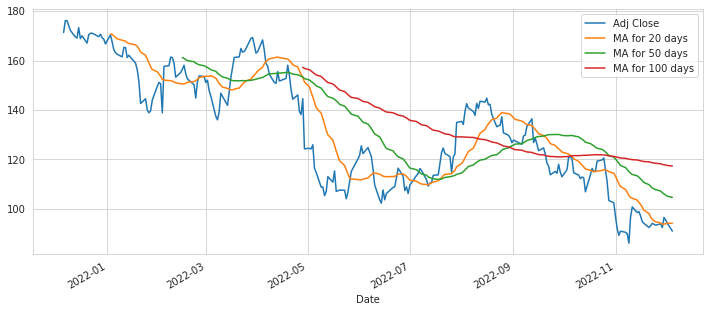

In [21]:
AMZN[['Adj Close','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(12,5))

#### **What was the daily return average of a stock?**

In [22]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

In [23]:
AMZN['Daily Return'].tail()

Date
2022-11-29   -0.016285
2022-11-30    0.044579
2022-12-01   -0.010773
2022-12-02   -0.014346
2022-12-05   -0.033146
Name: Daily Return, dtype: float64

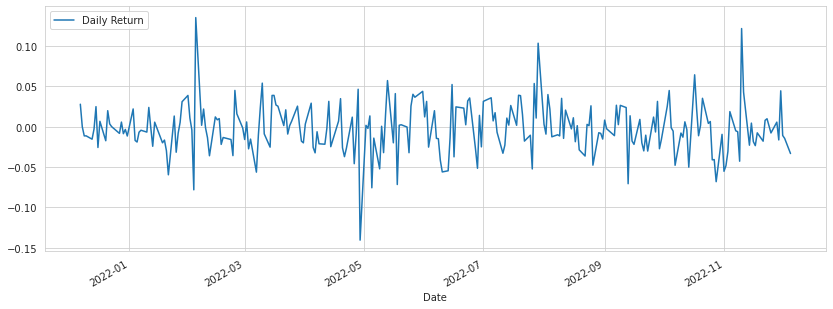

In [24]:
#Plotting the daily return
AMZN['Daily Return'].plot(figsize=(14,5),legend=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


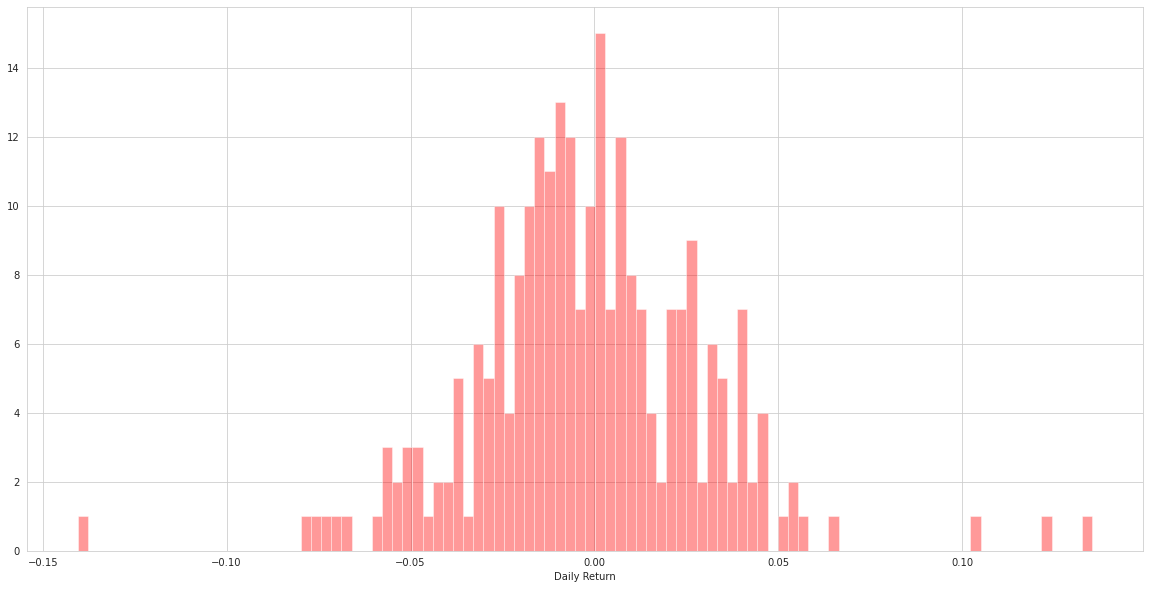

In [25]:
f,ax=plt.subplots(figsize=(20,10))
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red',kde=False,ax=ax)

#### **Add a new column ‘Trend’ whose values are based on the 'Daily Return'**


In [26]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-11-29,94.410004,91.440002,94.040001,92.419998,65567300.0,92.419998,Amazon,93.8185,106.5446,118.0013,-0.016285,Slight Negative
2022-11-30,96.540001,91.529999,92.470001,96.540001,102628200.0,96.540001,Amazon,93.8060,106.0316,117.8492,0.044579,Positive
2022-12-01,97.230003,94.919998,96.989998,95.500000,68488000.0,95.500000,Amazon,93.9750,105.5708,117.7120,-0.010773,Slight or No change
2022-12-02,95.360001,93.779999,94.480003,94.129997,72427000.0,94.129997,Amazon,94.2165,105.1072,117.5493,-0.014346,Slight or No change
2022-12-05,94.059998,90.820000,93.050003,91.010002,71391500.0,91.010002,Amazon,94.2180,104.6518,117.3531,-0.033146,Slight Negative


#### **Visualize the trend frequency through a Pie Chart**

Text(0.5, 1.0, 'Trend Frequency using a Pie Chart')

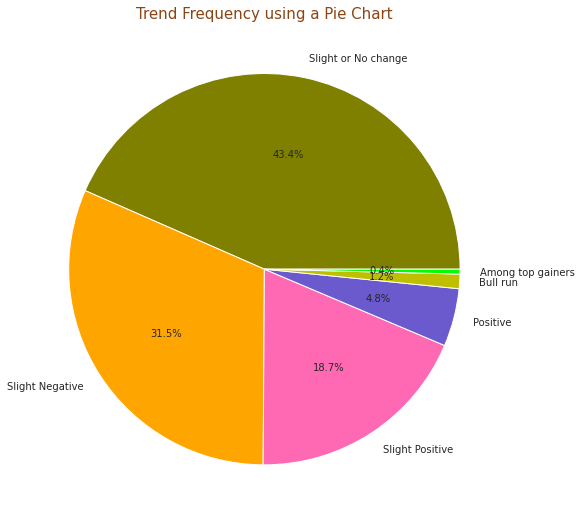

In [27]:
labels=AMZN.Trend.value_counts().index
colors=["olive","orange","hotpink","slateblue","y","lime"]
sizes=AMZN.Trend.value_counts().values
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)

#### **What was the correlation between daily returns of different stocks?**

Merging the columns of all companies Adjacent close 

In [28]:
all_adj = pd.concat([AAPL['Adj Close'] ,GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis = 1)

In [29]:
all_adj.columns = ['Apple','Google','Amazon','Microsoft']

In [30]:
all_adj

,Apple,Google,Amazon,Microsoft
Date,,,,
2021-12-06,164.366058,143.796494,171.368500,323.161926
2021-12-07,170.192215,148.036499,176.164505,331.810883
2021-12-08,174.069748,148.720505,176.158005,331.860413
2021-12-09,173.552734,148.106003,174.171005,330.007751
2021-12-10,178.414520,148.675003,172.212006,339.360138
...,...,...,...,...
2022-11-29,141.169998,95.440002,92.419998,240.330002
2022-11-30,148.029999,101.449997,96.540001,255.139999
2022-12-01,148.309998,101.279999,95.500000,254.690002


In [31]:
pct_df = all_adj.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-11-29,-0.021148,-0.008416,-0.016285,-0.005915
2022-11-30,0.048594,0.062971,0.044579,0.061624
2022-12-01,0.001892,-0.001676,-0.010773,-0.001764
2022-12-02,-0.003371,-0.004443,-0.014346,0.001296
2022-12-05,-0.007983,-0.009521,-0.033146,-0.018901


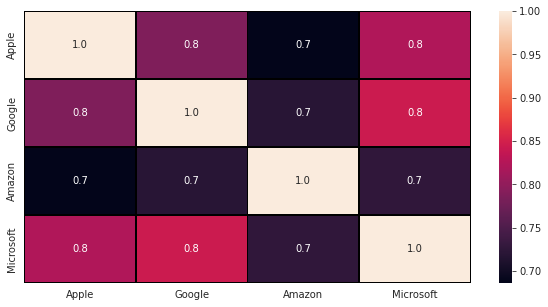

In [32]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 